In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)

In [2]:
sheet_id = '1wLXAt2bZEGKIeE_mvg1zYUSAfQCjkrDOREjLKxL55ZE'
sheet_name = 'Employee-Attrition'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)
from Fun import Employee_Attrition
EA = Employee_Attrition()
df = EA.clean(df)

In [3]:
cat_col = df.select_dtypes(include='object').drop('attrition',axis=1)

In [4]:
df.select_dtypes(exclude='object')

,age,dailyrate,distancefromhome,education,employeecount,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
2,49,279,8,1,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
4,37,1373,2,2,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
5,33,1392,3,4,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
7,27,591,2,1,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,884,23,2,1,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,613,6,1,1,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
2064,27,155,4,3,1,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3


In [5]:
for i in df.select_dtypes(exclude='object'):
    print(50*"*")
    print(df[i].value_counts())
    print(50*"*")

**************************************************
age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
28    48
27    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
48    19
51    19
53    19
54    18
52    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
**************************************************
**************************************************
dailyrate
691     6
1082    5
329     5
530     5
408     5
       ..
1382    1
161     1
801     1
642     1
1154    1
Name: count, Length: 886, dtype: int64
**************************************************
**************************************************
distancefromhome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
15

In [6]:
cat_col = df.select_dtypes(include='object').drop('attrition',axis=1)
num_dis = df[['education','environmentsatisfaction','jobinvolvement','joblevel','jobsatisfaction','performancerating','relationshipsatisfaction',
           'stockoptionlevel','worklifebalance']]
num_con = df[['age','dailyrate','distancefromhome','hourlyrate','monthlyincome','monthlyrate','numcompaniesworked','percentsalaryhike',
            'totalworkingyears','trainingtimeslastyear','yearsatcompany','yearsincurrentrole','yearssincelastpromotion',
            'yearswithcurrmanager']]

EDA

In [7]:
cat_col.head()

,businesstravel,department,educationfield,gender,jobrole,maritalstatus,over18,overtime
employeenumber,,,,,,,,
1,travel_rarely,sales,life sciences,female,sales executive,single,y,yes
2,travel_frequently,research & development,life sciences,male,research scientist,married,y,no
4,travel_rarely,research & development,other,male,laboratory technician,single,y,yes
5,travel_frequently,research & development,life sciences,female,research scientist,married,y,yes
7,travel_rarely,research & development,medical,male,laboratory technician,married,y,no


In [8]:
import plotly.express as px
import nbformat

In [9]:
for i in cat_col.columns:
    cross_tab = pd.crosstab(df[i],df['attrition'])
    cross_tab['Ratio'] = cross_tab['yes']/(cross_tab['yes']+cross_tab['no'])
    cross_tab = cross_tab.sort_values(by='Ratio',ascending=False)
    fig = px.bar(cross_tab, x = cross_tab.index,y = 'Ratio',
                 title=i)
    fig.show()

In [10]:
num_dis

,education,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,performancerating,relationshipsatisfaction,stockoptionlevel,worklifebalance
employeenumber,,,,,,,,,
1,2,2,3,2,4,3,1,0,1
2,1,3,2,2,2,4,4,1,3
4,2,4,2,1,3,3,2,0,3
5,4,4,3,1,3,3,3,0,3
7,1,1,3,1,2,3,4,1,3
...,...,...,...,...,...,...,...,...,...
2061,2,3,4,2,4,3,3,1,3
2062,1,4,2,3,1,3,1,1,3
2064,3,2,4,2,2,4,2,1,3


In [11]:
for i in num_dis.columns:
    cross_tab = pd.crosstab(df[i],df['attrition'])
    cross_tab['Ratio'] = cross_tab['yes']/(cross_tab['yes']+cross_tab['no'])
    cross_tab.sort_values(by='Ratio',ascending=False)
    fig = px.bar(cross_tab,x=cross_tab.index,y='Ratio',
                 title=i)
    fig.show()

In [12]:
num_con

,age,dailyrate,distancefromhome,hourlyrate,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,
1,41,1102,1,94,5993,19479,8,11,8,0,6,4,0,5
2,49,279,8,61,5130,24907,1,23,10,3,10,7,1,7
4,37,1373,2,92,2090,2396,6,15,7,3,0,0,0,0
5,33,1392,3,56,2909,23159,1,11,8,3,8,7,3,0
7,27,591,2,40,3468,16632,9,12,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,884,23,41,2571,12290,4,17,17,3,5,2,0,3
2062,39,613,6,42,9991,21457,4,15,9,5,7,7,1,7
2064,27,155,4,87,6142,5174,1,20,6,0,6,2,0,3


In [13]:
for i in num_con.columns:
    fig = px.histogram(df,x=i,color='attrition',
                 title=i,color_discrete_map={'no':'#0000FF','yes':'#FF0000'})
    fig.show()

### Outlayers Cheking

In [14]:
for i in num_con.columns:
     px.histogram(num_con,x=i,title=i).show()

In [15]:
num_con.describe()

,age,dailyrate,distancefromhome,hourlyrate,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [16]:
for i in num_con.columns:
    px.box(num_con,x = i,title=i,orientation='h').show()

In [17]:
for i in ['totalworkingyears','yearsincurrentrole','yearswithcurrmanager','yearsatcompany']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    px.scatter(df[df['yearsatcompany'] > upper_bound], x = 'age',y=i).show()

In [18]:
df[df['yearswithcurrmanager'] > (df['age'] - 18)]

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [19]:
df[df['yearsincurrentrole'] > (df['age'] - 18)]

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [20]:
df[df['totalworkingyears'] > (df['age'] - 18)]

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [21]:
df[df['yearsatcompany'] > (df['age'] - 18)]

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Lets prove mathe matical

### cat vs cat Chi squre test

In [22]:
cat_col

,businesstravel,department,educationfield,gender,jobrole,maritalstatus,over18,overtime
employeenumber,,,,,,,,
1,travel_rarely,sales,life sciences,female,sales executive,single,y,yes
2,travel_frequently,research & development,life sciences,male,research scientist,married,y,no
4,travel_rarely,research & development,other,male,laboratory technician,single,y,yes
5,travel_frequently,research & development,life sciences,female,research scientist,married,y,yes
7,travel_rarely,research & development,medical,male,laboratory technician,married,y,no
...,...,...,...,...,...,...,...,...
2061,travel_frequently,research & development,medical,male,laboratory technician,married,y,no
2062,travel_rarely,research & development,medical,male,healthcare representative,married,y,no
2064,travel_rarely,research & development,life sciences,male,manufacturing director,married,y,yes


In [23]:
import pandas as pd
from scipy.stats import chi2_contingency

cat_col_rqu = []

for i in cat_col.columns:
        
    # Observed table (actual survey)
    data = pd.crosstab(df[i],df['attrition'])

    print(10*'*',i,10*'*')
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(data)

    print("Chi-Square Statistic:", round(chi2, 2))
    print("Degrees of Freedom:", dof)
    print("p-value:", round(p, 4))
    print("Expected Frequencies:\n", expected)

    # Interpretation
    alpha = 0.05
    print(50*'-')
    if p < alpha:
        print(f"Reject the null hypothesis → {i} and attrition are related.")

        cat_col_rqu.append(i)
    else:
        print("Fail to reject null hypothesis → No relationship.")
    print(50*'-')
    print(50*'*')
    print('')
print(cat_col_rqu)

********** businesstravel **********
Chi-Square Statistic: 24.18
Degrees of Freedom: 2
p-value: 0.0
Expected Frequencies:
 [[125.81632653  24.18367347]
 [232.34081633  44.65918367]
 [874.84285714 168.15714286]]
--------------------------------------------------
Reject the null hypothesis → businesstravel and attrition are related.
--------------------------------------------------
**************************************************

********** department **********
Chi-Square Statistic: 10.8
Degrees of Freedom: 2
p-value: 0.0045
Expected Frequencies:
 [[ 52.84285714  10.15714286]
 [806.06326531 154.93673469]
 [374.09387755  71.90612245]]
--------------------------------------------------
Reject the null hypothesis → department and attrition are related.
--------------------------------------------------
**************************************************

********** educationfield **********
Chi-Square Statistic: 16.02
Degrees of Freedom: 5
p-value: 0.0068
Expected Frequencies:
 [[ 22.64

### Num_dis vs cat also cat vs cat Chi squre test

In [24]:
import pandas as pd
from scipy.stats import chi2_contingency

num_dis_rqu = []

for i in num_dis.columns:
        
    # Observed table (actual survey)
    data = pd.crosstab(df[i],df['attrition'])

    print(10*'*',i,10*'*')
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(data)

    print("Chi-Square Statistic:", round(chi2, 2))
    print("Degrees of Freedom:", dof)
    print("p-value:", round(p, 4))
    print("Expected Frequencies:\n", expected)

    # Interpretation
    alpha = 0.05
    print(50*'-')
    if p < alpha:
        print(f"Reject the null hypothesis → {i} and attrition are related.")

        num_dis_rqu.append(i)
    else:
        print("Fail to reject null hypothesis → No relationship.")
    print(50*'-')
    print(50*'*')
    print('')
print(num_dis_rqu)

********** education **********
Chi-Square Statistic: 3.07
Degrees of Freedom: 4
p-value: 0.5455
Expected Frequencies:
 [[142.59183673  27.40816327]
 [236.53469388  45.46530612]
 [479.77959184  92.22040816]
 [333.83265306  64.16734694]
 [ 40.26122449   7.73877551]]
--------------------------------------------------
Fail to reject null hypothesis → No relationship.
--------------------------------------------------
**************************************************

********** environmentsatisfaction **********
Chi-Square Statistic: 22.5
Degrees of Freedom: 3
p-value: 0.0001
Expected Frequencies:
 [[238.2122449   45.7877551 ]
 [240.72857143  46.27142857]
 [379.96530612  73.03469388]
 [374.09387755  71.90612245]]
--------------------------------------------------
Reject the null hypothesis → environmentsatisfaction and attrition are related.
--------------------------------------------------
**************************************************

********** jobinvolvement **********
Chi-Squa

### Num_con vs  cat In here categorical in attrition having 2 class so we go for 2sample t test

In [25]:
num_con

,age,dailyrate,distancefromhome,hourlyrate,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,
1,41,1102,1,94,5993,19479,8,11,8,0,6,4,0,5
2,49,279,8,61,5130,24907,1,23,10,3,10,7,1,7
4,37,1373,2,92,2090,2396,6,15,7,3,0,0,0,0
5,33,1392,3,56,2909,23159,1,11,8,3,8,7,3,0
7,27,591,2,40,3468,16632,9,12,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,884,23,41,2571,12290,4,17,17,3,5,2,0,3
2062,39,613,6,42,9991,21457,4,15,9,5,7,7,1,7
2064,27,155,4,87,6142,5174,1,20,6,0,6,2,0,3


In [26]:
df[df['attrition'] == 'yes']['age']

employeenumber
1       41
4       37
19      28
27      36
31      34
        ..
2023    23
2027    29
2032    56
2044    50
2055    50
Name: age, Length: 237, dtype: int64

In [27]:
from scipy.stats import ttest_ind
num_con_req = []

for i in num_con.columns:
    
    print(10*'*',i,10*'*')
    # Class A and B scores
    class_a = df[df['attrition'] == 'yes'][i]
    class_b = df[df['attrition'] == 'no'][i]

    # Perform two-sample t-test (assume equal variances)
    t_stat, p_val = ttest_ind(class_a, class_b)

    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_val:.6f}")

    # Interpretation
    alpha = 0.05
    print(50*'-')
    if p_val < alpha:
        print("Reject the null hypothesis: The class averages are significantly different.")
        num_con_req.append(i)
    else:
        print("Fail to reject the null hypothesis: No significant difference.")
    print(50*'-')
    print(50*'*')
    print('')
print(num_con_req)

********** age **********
t-statistic: -6.1787
p-value: 0.000000
--------------------------------------------------
Reject the null hypothesis: The class averages are significantly different.
--------------------------------------------------
**************************************************

********** dailyrate **********
t-statistic: -2.1741
p-value: 0.029858
--------------------------------------------------
Reject the null hypothesis: The class averages are significantly different.
--------------------------------------------------
**************************************************

********** distancefromhome **********
t-statistic: 2.9947
p-value: 0.002793
--------------------------------------------------
Reject the null hypothesis: The class averages are significantly different.
--------------------------------------------------
**************************************************

********** hourlyrate **********
t-statistic: -0.2623
p-value: 0.793135
-------------------------

In [28]:
print(cat_col_rqu)
print(num_dis_rqu)
print(num_con_req)

['businesstravel', 'department', 'educationfield', 'jobrole', 'maritalstatus', 'overtime']
['environmentsatisfaction', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'stockoptionlevel', 'worklifebalance']
['age', 'dailyrate', 'distancefromhome', 'monthlyincome', 'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole', 'yearswithcurrmanager']


In [29]:
cat_col = cat_col[cat_col_rqu]
num_dis = num_dis[num_dis_rqu]
num_con = num_con[num_con_req]

In [30]:
'''cat_col = cat_col[cat_col_rqu]
num_dis = num_dis[['joblevel', 'jobsatisfaction', 'worklifebalance']]
num_con = num_con[['age', 'distancefromhome', 'monthlyincome', 'yearsatcompany']]'''

"cat_col = cat_col[cat_col_rqu]\nnum_dis = num_dis[['joblevel', 'jobsatisfaction', 'worklifebalance']]\nnum_con = num_con[['age', 'distancefromhome', 'monthlyincome', 'yearsatcompany']]"

In [31]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [32]:
order_list = []
for i in cat_col.columns:
    cross_tab = pd.crosstab(df[i],df['attrition'])
    cross_tab['Ratio'] = cross_tab['yes']/(cross_tab['yes']+cross_tab['no'])
    cross_tab = cross_tab.sort_values(by='Ratio',ascending=False)
    order_list.append(cross_tab.index.to_list())

In [33]:
order_list

[['travel_frequently', 'travel_rarely', 'non-travel'],
 ['sales', 'human resources', 'research & development'],
 ['human resources',
  'technical degree',
  'marketing',
  'life sciences',
  'medical',
  'other'],
 ['sales representative',
  'laboratory technician',
  'human resources',
  'sales executive',
  'research scientist',
  'manufacturing director',
  'healthcare representative',
  'manager',
  'research director'],
 ['single', 'married', 'divorced'],
 ['yes', 'no']]

In [34]:
cat_trans = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OrdinalEncoder(categories=order_list,dtype='int'))
    ]
)
cat_trans

,steps,"[('imputer', ...), ('encoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,"[['travel_frequently', 'travel_rarely', ...], ['sales', 'human resources', ...], ...]"


In [35]:
num_dis_trans = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
    ]
)
num_dis_trans

,steps,"[('imputer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [36]:
num_con_trans = Pipeline(
    steps=[
        ('imputer',SimpleImputer(missing_values = np.nan,strategy='mean')),
        ('Scale', StandardScaler())
    ]
)
num_con_trans

,steps,"[('imputer', ...), ('Scale', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [37]:
col_trans = ColumnTransformer(
    transformers=[
        ('cat',cat_trans,cat_col.columns),
        ('num_dis',num_dis_trans,num_dis.columns),
        ('num_con',num_con_trans,num_con.columns)
    ]
)
col_trans

,transformers,"[('cat', ...), ('num_dis', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [38]:
Preprocess = Pipeline(
    steps=[
        ('PP_trans',col_trans)
    ]
)
Preprocess

,steps,"[('PP_trans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num_dis', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
import pickle
# pickle.dump(preprocess,open('Att_Preprocess.pkl','wb'))

In [39]:
x = pd.concat([cat_col,num_dis,num_con],axis=1)
x

,businesstravel,department,educationfield,jobrole,maritalstatus,overtime,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,stockoptionlevel,worklifebalance,age,dailyrate,distancefromhome,monthlyincome,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearswithcurrmanager
employeenumber,,,,,,,,,,,,,,,,,,,,,
1,travel_rarely,sales,life sciences,sales executive,single,yes,2,3,2,4,0,1,41,1102,1,5993,8,0,6,4,5
2,travel_frequently,research & development,life sciences,research scientist,married,no,3,2,2,2,1,3,49,279,8,5130,10,3,10,7,7
4,travel_rarely,research & development,other,laboratory technician,single,yes,4,2,1,3,0,3,37,1373,2,2090,7,3,0,0,0
5,travel_frequently,research & development,life sciences,research scientist,married,yes,4,3,1,3,0,3,33,1392,3,2909,8,3,8,7,0
7,travel_rarely,research & development,medical,laboratory technician,married,no,1,3,1,2,1,3,27,591,2,3468,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,travel_frequently,research & development,medical,laboratory technician,married,no,3,4,2,4,1,3,36,884,23,2571,17,3,5,2,3
2062,travel_rarely,research & development,medical,healthcare representative,married,no,4,2,3,1,1,3,39,613,6,9991,9,5,7,7,7
2064,travel_rarely,research & development,life sciences,manufacturing director,married,yes,2,4,2,2,1,3,27,155,4,6142,6,0,6,2,3


In [40]:
Preprocess.fit(x)

,steps,"[('PP_trans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num_dis', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [41]:
x = pd.DataFrame(Preprocess.transform(x),columns=Preprocess.get_feature_names_out())
x

,cat__businesstravel,cat__department,cat__educationfield,cat__jobrole,cat__maritalstatus,cat__overtime,num_dis__environmentsatisfaction,num_dis__jobinvolvement,num_dis__joblevel,num_dis__jobsatisfaction,num_dis__stockoptionlevel,num_dis__worklifebalance,num_con__age,num_con__dailyrate,num_con__distancefromhome,num_con__monthlyincome,num_con__totalworkingyears,num_con__trainingtimeslastyear,num_con__yearsatcompany,num_con__yearsincurrentrole,num_con__yearswithcurrmanager
0,1.0,0.0,3.0,3.0,0.0,0.0,2.0,3.0,2.0,4.0,0.0,1.0,0.446350,0.742527,-1.010909,-0.108350,-0.421642,-2.171982,-0.164613,-0.063296,0.245834
1,0.0,2.0,3.0,4.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,3.0,1.322365,-1.297775,-0.147150,-0.291719,-0.164511,0.155707,0.488508,0.764998,0.806541
2,1.0,2.0,5.0,1.0,0.0,0.0,4.0,2.0,1.0,3.0,0.0,3.0,0.008343,1.414363,-0.887515,-0.937654,-0.550208,0.155707,-1.144294,-1.167687,-1.155935
3,0.0,2.0,3.0,4.0,1.0,0.0,4.0,3.0,1.0,3.0,0.0,3.0,-0.429664,1.461466,-0.764121,-0.763634,-0.421642,0.155707,0.161947,0.764998,-1.155935
4,1.0,2.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,3.0,-1.086676,-0.524295,-0.887515,-0.644858,-0.678774,0.155707,-0.817734,-0.615492,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,2.0,4.0,1.0,1.0,1.0,3.0,4.0,2.0,4.0,1.0,3.0,-0.101159,0.202082,1.703764,-0.835451,0.735447,0.155707,-0.327893,-0.615492,-0.314873
1466,1.0,2.0,4.0,6.0,1.0,1.0,4.0,2.0,3.0,1.0,1.0,3.0,0.227347,-0.469754,-0.393938,0.741140,-0.293077,1.707500,-0.001333,0.764998,0.806541
1467,1.0,2.0,3.0,5.0,1.0,0.0,2.0,4.0,2.0,2.0,1.0,3.0,-1.086676,-1.605183,-0.640727,-0.076690,-0.678774,-2.171982,-0.164613,-0.615492,-0.314873
1468,0.0,0.0,4.0,3.0,1.0,1.0,4.0,2.0,2.0,2.0,0.0,2.0,1.322365,0.546677,-0.887515,-0.236474,0.735447,0.155707,0.325228,0.488900,1.086895


In [42]:
y = df['attrition'].apply(lambda x : 1 if x == 'yes' else 0)
y

employeenumber
1       1
2       0
4       1
5       0
7       0
       ..
2061    0
2062    0
2064    0
2065    0
2068    0
Name: attrition, Length: 1470, dtype: int64

In [43]:
y.value_counts()

attrition
0    1233
1     237
Name: count, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,shuffle=True)

In [45]:
y_test

employeenumber
1469    0
250     0
1714    1
86      0
304     0
       ..
792     0
1640    0
335     0
1987    0
1934    0
Name: attrition, Length: 368, dtype: int64

In [46]:
from imblearn.over_sampling import RandomOverSampler
print('Original target sample:',y_train.value_counts())
ada = RandomOverSampler()
x_train_resampled,y_train_resampled = ada.fit_resample ( x_train , y_train )
print('Resampled target data sample:',y_train_resampled.value_counts())

Original target sample: attrition
0    913
1    189
Name: count, dtype: int64
Resampled target data sample: attrition
0    913
1    913
Name: count, dtype: int64


In [47]:
'''from imblearn.over_sampling import ADASYN
print('Original target sample:',y_train.value_counts())
ada = ADASYN()
x_train_resampled,y_train_resampled = ada.fit_resample ( x_train , y_train )
print('Resampled target data sample:',y_train_resampled.value_counts())'''

"from imblearn.over_sampling import ADASYN\nprint('Original target sample:',y_train.value_counts())\nada = ADASYN()\nx_train_resampled,y_train_resampled = ada.fit_resample ( x_train , y_train )\nprint('Resampled target data sample:',y_train_resampled.value_counts())"

In [48]:
from sklearn.metrics import confusion_matrix,classification_report

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       913
           1       0.77      0.76      0.77       913

    accuracy                           0.77      1826
   macro avg       0.77      0.77      0.77      1826
weighted avg       0.77      0.77      0.77      1826

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       320
           1       0.29      0.62      0.39        48

    accuracy                           0.75       368
   macro avg       0.61      0.70      0.62       368
weighted avg       0.85      0.75      0.78       368

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

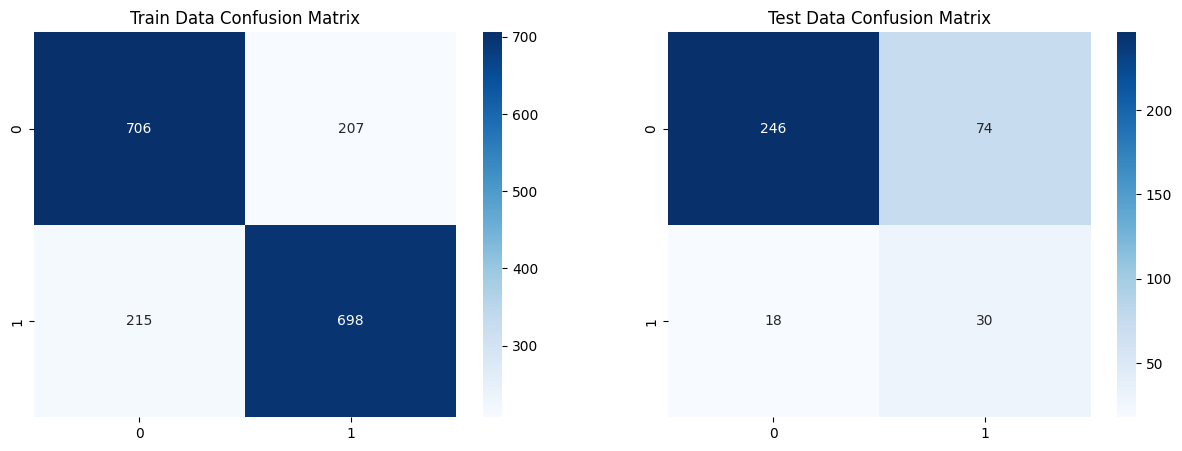

In [49]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(class_weight='balanced')
LR.fit(x_train_resampled,y_train_resampled)

y_train_pread = LR.predict(x_train_resampled)
y_test_pread = LR.predict(x_test)


print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train_resampled, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train_resampled, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       913
           1       0.84      0.88      0.86       913

    accuracy                           0.86      1826
   macro avg       0.86      0.86      0.86      1826
weighted avg       0.86      0.86      0.86      1826

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       320
           1       0.35      0.58      0.44        48

    accuracy                           0.80       368
   macro avg       0.64      0.71      0.66       368
weighted avg       0.85      0.80      0.82       368

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

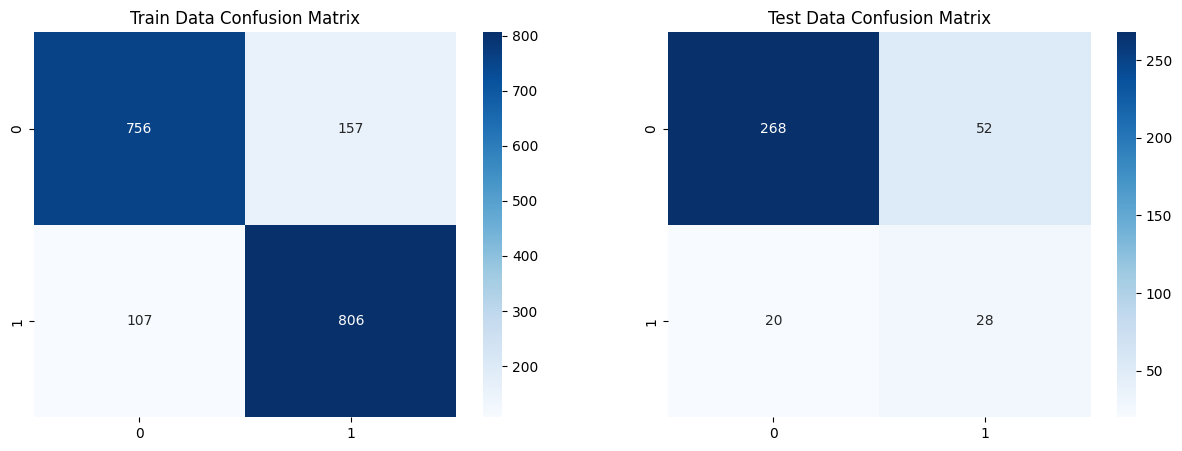

In [50]:
from sklearn.svm import SVC
SV = SVC()
SV.fit(x_train_resampled,y_train_resampled)

y_train_pread = SV.predict(x_train_resampled)
y_test_pread = SV.predict(x_test)


print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train_resampled, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train_resampled, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       913

    accuracy                           1.00      1826
   macro avg       1.00      1.00      1.00      1826
weighted avg       1.00      1.00      1.00      1826

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       320
           1       0.37      0.40      0.38        48

    accuracy                           0.83       368
   macro avg       0.64      0.65      0.64       368
weighted avg       0.84      0.83      0.83       368

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

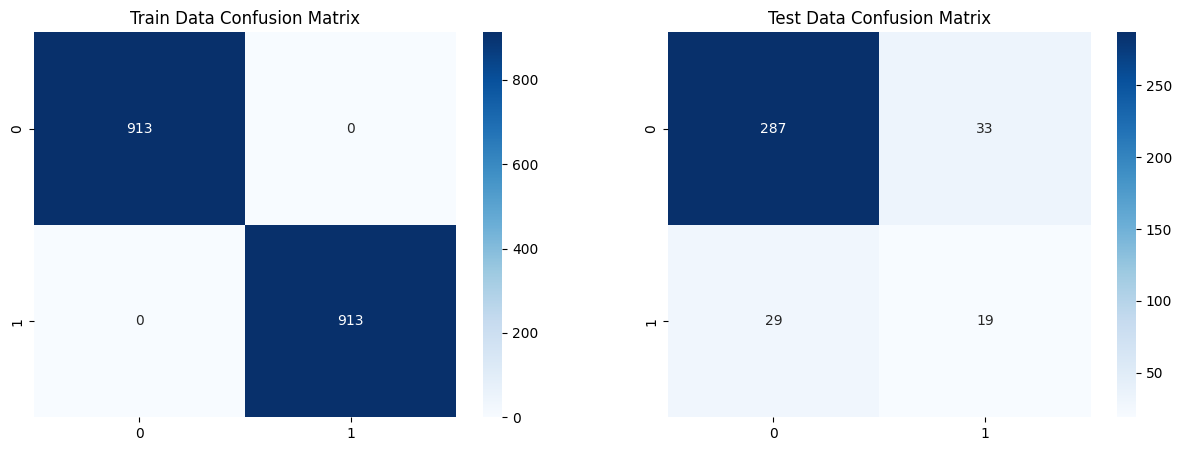

In [51]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(x_train_resampled,y_train_resampled)

y_train_pread = DT.predict(x_train_resampled)
y_test_pread = DT.predict(x_test)


print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train_resampled, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train_resampled, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       913
           1       0.97      0.98      0.98       913

    accuracy                           0.98      1826
   macro avg       0.98      0.98      0.98      1826
weighted avg       0.98      0.98      0.98      1826

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       320
           1       0.39      0.35      0.37        48

    accuracy                           0.84       368
   macro avg       0.65      0.63      0.64       368
weighted avg       0.84      0.84      0.84       368

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

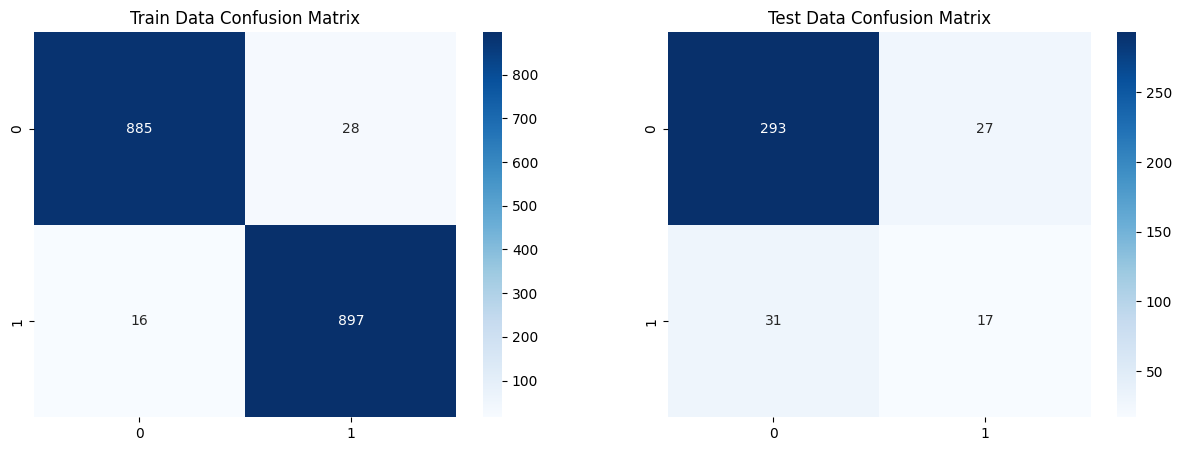

In [52]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50,
                            max_depth=10,               
                            min_samples_leaf=5,
                            min_samples_split= 5,        
                            class_weight='balanced',
                            random_state=42
                            )
RFC.fit(x_train_resampled,y_train_resampled)

y_train_pread = RFC.predict(x_train_resampled)
y_test_pread = RFC.predict(x_test)


print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train_resampled, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train_resampled, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameter={
    'n_estimators':[i for i in range(5,10)],
    'max_depth':[i for i in range(1,5)],
    'min_samples_split':[i for i in range(1,5)],
    'min_samples_leaf':[i for i in range(1,5)]
}

In [55]:
Hyper_RFC = GridSearchCV(RandomForestClassifier(random_state=42,class_weight='balanced'),parameter,cv=5)
Hyper_RFC.fit(x_train,y_train)
Hyper_RFC.fit(x_train_resampled,y_train_resampled)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [1, 2, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [1, 2, ...], 'n_estimators': [5, 6, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,8


------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       913
           1       0.85      0.75      0.80       913

    accuracy                           0.81      1826
   macro avg       0.81      0.81      0.81      1826
weighted avg       0.81      0.81      0.81      1826

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       320
           1       0.34      0.50      0.40        48

    accuracy                           0.81       368
   macro avg       0.63      0.68      0.64       368
weighted avg       0.84      0.81      0.82       368

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

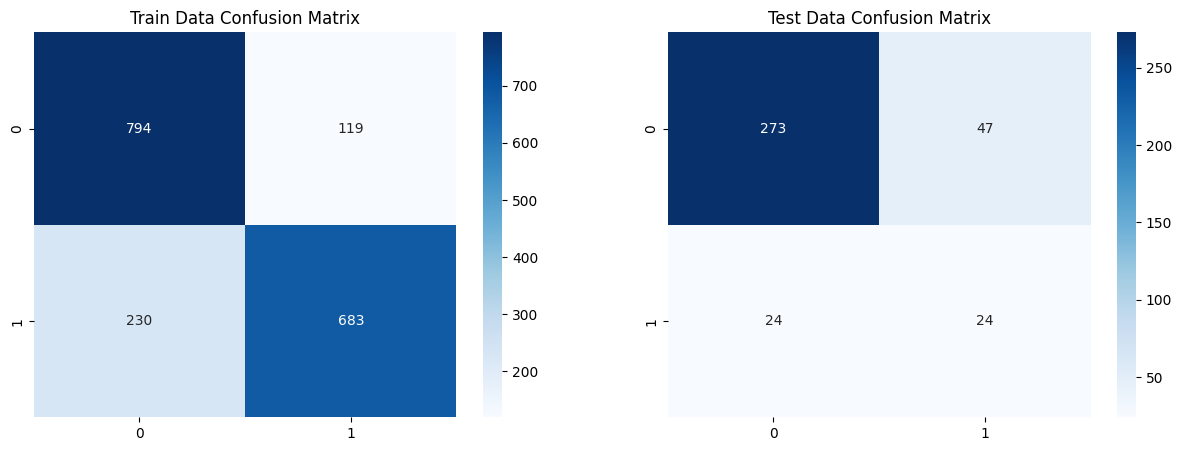

In [56]:
y_train_pread = Hyper_RFC.predict(x_train_resampled)
y_test_pread = Hyper_RFC.predict(x_test)


print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train_resampled, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train_resampled, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')